Importing required libraries

In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Reading CSV data file

In [106]:
gold_df = pd.read_csv("sample_data/data.csv", index_col = "date", parse_dates = True)
gold_df = gold_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Checking for null values

In [107]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 818 entries, 1950-01-01 to 2018-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   818 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


In [108]:
gold_df.isnull().sum()

price    0
dtype: int64

Descriptive stats for price variable

In [109]:
gold_df.describe()

,price
count,818.000000
mean,381.194630
std,418.855501
min,34.490000
25%,35.189250
50%,303.033500
75%,422.873750
max,1780.648000


In [110]:
gold_df.head()

,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [111]:
gold_df.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


Plotting price of gold

<Axes: xlabel='date'>

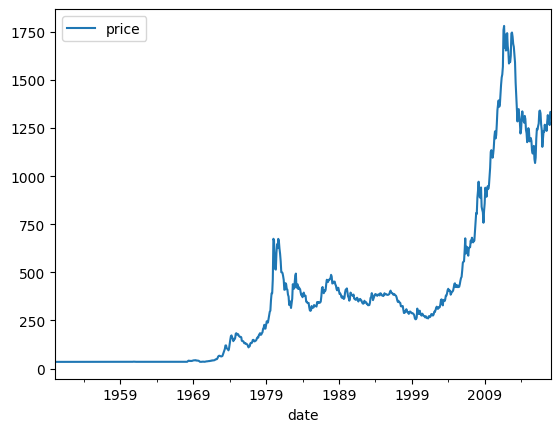

In [112]:
gold_df.plot()

Creating dataframe for gold price from 2009-01-01 to 2018-01-01 and plotting

In [113]:
start_date = "2009-01-01"
end_date = "2018-01-01"
gold_df = gold_df.loc[(gold_df.index >= start_date) & (gold_df.index < end_date)]

<Axes: xlabel='date'>

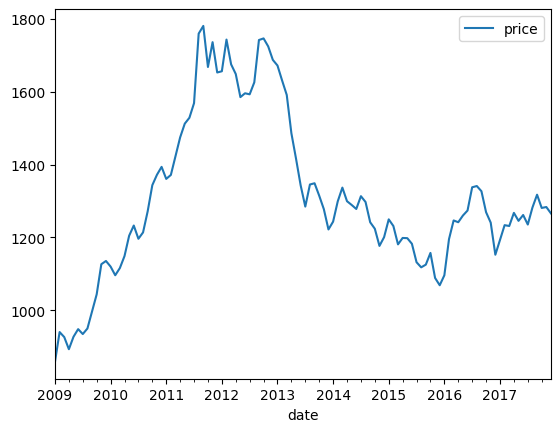

In [114]:
gold_df.index.freq = "MS"
gold_df.plot()

Calculating rolling mean for gold price from 2009-01-01 to 2018-01-01 and plotting

In [115]:
gold_yearly = gold_df.rolling(window = 12).mean()

<Axes: xlabel='date'>

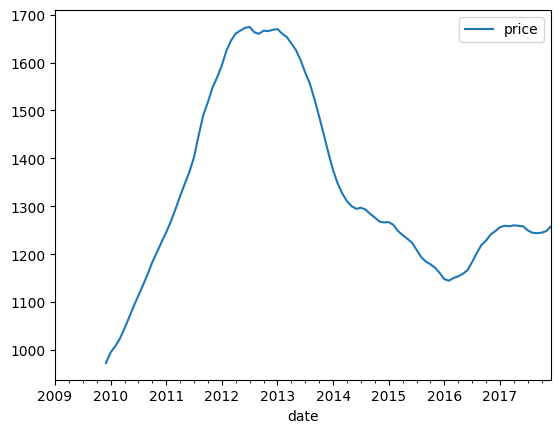

In [116]:
gold_yearly.plot()

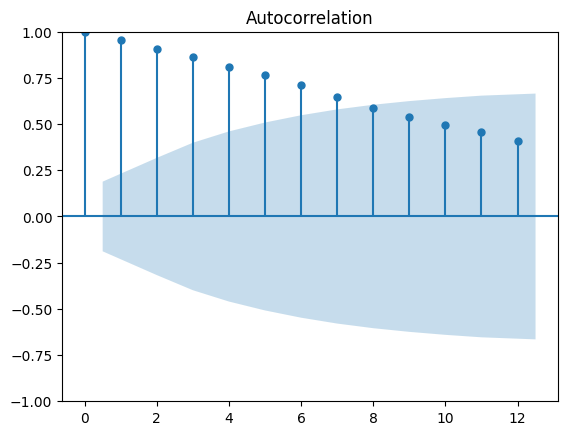

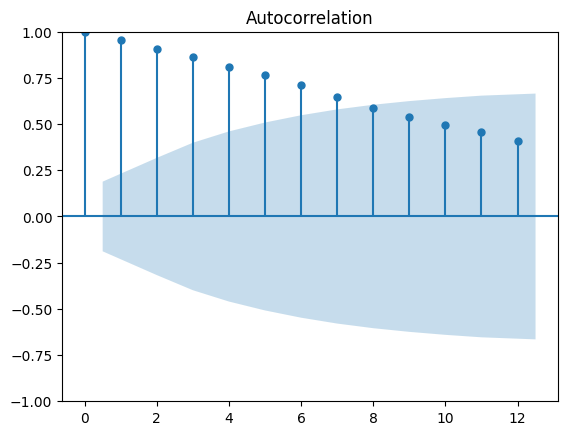

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(gold_df["price"], lags = 12)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


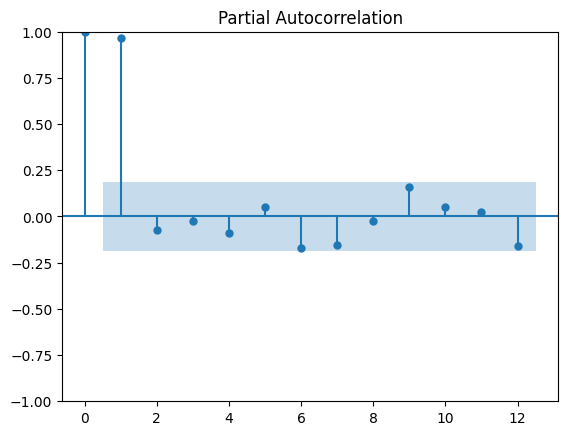

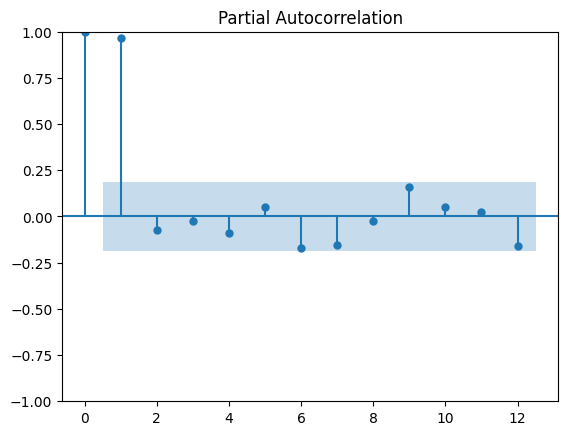

In [118]:
plot_pacf(gold_df["price"], lags = 12)

Creating function for adfuller test

In [119]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series, autolag = "AIC")
  labels = ["ADF Test Statistic", "p_value", "#_lags_used", "#_observations"]
  out = pd.Series(result[0:4], index = labels)
  print(out.to_string())
  if result[1] <= 0.05:
    print("Reject the null hypothesis. Data has no unit root and stationary")
  else:
    print("Failed to reject the null hypothesis. Data has a unit root and non-stationary")

In [120]:
adf_test(gold_df["price"])

ADF Test Statistic     -2.133761
p_value                 0.231158
#_lags_used             5.000000
#_observations        102.000000
Failed to reject the null hypothesis. Data has a unit root and non-stationary


Identifying best ARIMA model

In [121]:
from pmdarima import auto_arima
arima_fit = auto_arima(gold_df["price"], start_p = 0, start_q = 0, max_p = 10, max_q = 10, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1861.677, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1150.780, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1152.045, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1148.396, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1152.930, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1149.835, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1473.891, Time=0.06 sec
 ARIMA(

Creating ARIMA model and plotting the forecated values

In [122]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(gold_df["price"], order = (1, 0, 1))
model_results = model.fit()
fcast = model_results.predict(start = len(gold_df), end = len(gold_df) + 24, typ = ("levels"))
fcast = fcast.rename("ARIMA 1,0,1 Forecast")

<Axes: xlabel='date'>

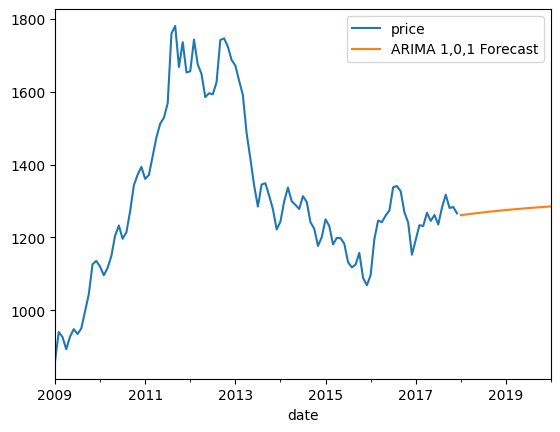

In [123]:
gold_df["price"].plot(legend = True)
fcast.plot(legend = True)